In [1]:
import torch

In [9]:
# stack: 텐서 간 결합

x = torch.FloatTensor([1,4])
print(x)

y = torch.FloatTensor([2,3])
print(y)

z = torch.FloatTensor([5,6])
print(z,'\n')

print(torch.stack((x,y,z)))
print(torch.stack((x,y,z),axis=1))

tensor([1., 4.])
tensor([2., 3.])
tensor([5., 6.]) 

tensor([[1., 4.],
        [2., 3.],
        [5., 6.]])
tensor([[1., 2., 5.],
        [4., 3., 6.]])


In [11]:
# cat: 텐서를 결합하는 메소드(concat과 유사한 동작)

x = torch.FloatTensor([1,4])
print(x)

y = torch.FloatTensor([2,3])
print(y)

z = torch.FloatTensor([5,6])
print(z,'\n')

print(torch.cat((x,y,z)))

tensor([1., 4.])
tensor([2., 3.])
tensor([5., 6.]) 

tensor([1., 4., 2., 3., 5., 6.])


cat은 stack과 유사하지만 쌓을 수 있는 차원(dim)이 존재해야 한다.

따라서 해당 차원을 지정해 주어야 결합할 수 있다.  
결합 차원 방향을 별도로 지정하지 않으면 1차원 방향으로 모두 이어붙인다.

In [14]:
a = torch.randn(1,3,3) # 3*3이 1장
b = torch.randn(1,3,3)
c = torch.cat((a,b), dim=0) # 3*3이 2장

print(c)
print(c.size()) # 3차원 방향으로 늘렸다

tensor([[[-0.6982, -0.8457, -0.1320],
         [ 0.6978,  0.5444, -0.7674],
         [ 0.3534, -0.7439,  0.4286]],

        [[-0.7777,  0.2444,  1.6500],
         [-1.6397,  1.5614,  0.2028],
         [-1.5475, -0.4332,  0.0792]]])
torch.Size([2, 3, 3])


In [17]:
print(torch.cat((a,b), dim=1)) # 1차원 방향으로 늘렸다
print(torch.cat((a,b), dim=1).size(), '\n')
print(torch.cat((a,b), dim=2))
print(torch.cat((a,b), dim=2).shape) # 2차원 방향으로 늘렸다

tensor([[[-0.6982, -0.8457, -0.1320],
         [ 0.6978,  0.5444, -0.7674],
         [ 0.3534, -0.7439,  0.4286],
         [-0.7777,  0.2444,  1.6500],
         [-1.6397,  1.5614,  0.2028],
         [-1.5475, -0.4332,  0.0792]]])
torch.Size([1, 6, 3]) 

tensor([[[-0.6982, -0.8457, -0.1320, -0.7777,  0.2444,  1.6500],
         [ 0.6978,  0.5444, -0.7674, -1.6397,  1.5614,  0.2028],
         [ 0.3534, -0.7439,  0.4286, -1.5475, -0.4332,  0.0792]]])
torch.Size([1, 3, 6])


In [23]:
# chunk: 텐서를 여러 개로 나눌 때 사용

tensor = torch.randint(1,10,(3,6))
print(tensor)

t1, t2, t3 = torch.chunk(tensor, 3, dim=1) # 입력하는 숫자는 '나누려는 텐서의 개수'

print(t1)
print(t2)
print(t3)

tensor([[5, 4, 2, 4, 4, 5],
        [9, 1, 3, 8, 7, 7],
        [3, 6, 6, 8, 9, 8]])
tensor([[5, 4],
        [9, 1],
        [3, 6]])
tensor([[2, 4],
        [3, 8],
        [6, 8]])
tensor([[4, 5],
        [7, 7],
        [9, 8]])


In [25]:
t1, t2, t3 = torch.chunk(tensor, 3, dim=0)

print(t1)
print(t2)
print(t3)

tensor([[5, 4, 2, 4, 4, 5]])
tensor([[9, 1, 3, 8, 7, 7]])
tensor([[3, 6, 6, 8, 9, 8]])


In [ ]:
# split: chunk와 동일한 기능이지만 텐서의 크기에 대해 조금 다른 양상을 보임

In [29]:
tensor = torch.randint(1,10,(3,6))
print(tensor)

t1, t2= torch.split(tensor, 3, dim=1) # 입력하는 숫자는 '얻고자 하는 텐서의 크기'

print(t1)
print(t2)
# print(t3)

tensor([[1, 9, 2, 1, 8, 8],
        [7, 2, 6, 3, 9, 9],
        [2, 2, 1, 6, 9, 8]])
tensor([[1, 9, 2],
        [7, 2, 6],
        [2, 2, 1]])
tensor([[1, 8, 8],
        [3, 9, 9],
        [6, 9, 8]])


torch와 numpy는 호환 가능하다.

torch ↔️ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함


In [30]:
import numpy as np

In [31]:
from torch.cuda import is_available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [32]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [34]:
print(a.to('cpu', torch.double))
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1., 1., 1.])


In [35]:
b = a.numpy()
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [36]:
a.add_(1) # a에만 1을 더했는데 a, b 모두 변했다
print(a)
print(b)

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [37]:
a = np.ones(7)
b = torch.from_numpy(a)
np.add(a,1,out=a)
print(a)
print(b) # cpu에서 메모리 공유가 되기 때문에 결과값은 같게 나올 것임

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

https://tutorials.pytorch.kr/beginner/basics/autogradqs_tutorial.html


- requiers_grad: 이 속성을 True로 설정하면 해당 텐서에서 이루어지는 모든 연산을 추적할 수 있다.  
기록 추적을 중단하려면 .detach()를 호출하여 연산 기록으로부터 분리하면 된다.

- requiers_grad_(...): 기존 텐서의 requiers_grad 값을 바꿔치기(inplace)하여 변경 

- grad_fn: 미분값을 계산한 함수에 대한 정보 저장(어떤 함수에 대해 backprop 했는지에 대해 저장

In [43]:
# _를 이용한 inplace 연산
x = torch.randint(1,10,(2,2))
y = torch.randint(1,10,(2,2))
print(x)
print(y,'\n')
y.add_(x) # y값에 y+x를 저장
print(y)

tensor([[4, 5],
        [3, 1]])
tensor([[3, 2],
        [4, 1]]) 

tensor([[7, 7],
        [7, 2]])


In [40]:
# requiers_grad
a = torch.randn(3,3)
a = a*3
print(a)
print(a.requires_grad)
a.requires_grad_(True) # _를 사용하면 inplace 연산
print(a.requires_grad)

tensor([[ 1.4667, -3.5050,  2.4166],
        [ 0.4731, -3.6659,  2.4832],
        [ 6.5937,  0.8227, -1.7011]])
False
True


In [41]:
# grad_fn
b = (a*a).sum()
print(b)
print(b.grad_fn)

tensor(87.1524, grad_fn=<SumBackward0>)


In [44]:
# 기울기(Gradient)
x = torch.ones(3,3,requires_grad=True)
print(x)
y = x+5
print(y) # 덧셈을 했다(add)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [50]:
z = y*y
out = z.mean()
print(z) # 곱셈을 했다(mul)
print(out) # 평균을 구했다(mean)

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>)
tensor(36., grad_fn=<MeanBackward0>)


In [49]:
print(out)
out.backward() # backward를 통해서 역전파 계산이 가능

tensor(36., grad_fn=<MeanBackward0>)


In [52]:
# gradL data가 거쳐온 layer에 대한 미분값 저장
print(x)
print(x.grad) # 미분값

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요 없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용


In [53]:
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [55]:
# detach(): 내용물은 같지만 추적 옵션이 꺼짐
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)
print(x)
print(y)

True
False
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

## $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [56]:
a = torch.ones(2,2)
print(a)

tensor([[1., 1.],
        [1., 1.]])


In [66]:
a = torch.ones(2,2,requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [67]:
print(a.data)
print(a.grad) # 미분값
print(a.grad_fn) # 계산할 때 사용한 함수. 현재 아무것도 연산하지 않았기 때문에 None이 나오는 게 맞다

tensor([[1., 1.],
        [1., 1.]])
None
None


In [68]:
b = a+2
print(b)

c = b**2
print(c) # 제곱이기 때문에 power

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)


In [69]:
out = c.sum()
print(out)

tensor(36., grad_fn=<SumBackward0>)


In [70]:
# 이렇게 다양한 연산을 거쳤으니 연산 흐름을 추적하면
# a.grad에도 내용이 채워지겠지?
out.backward()
print(a.grad)
print(a.grad_fn)

tensor([[6., 6.],
        [6., 6.]])
None


## 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

- `DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

- `ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요



토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행

In [71]:
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision import datasets

In [72]:
mnist_transforms = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=(0.5,),std=(1.0,))])
# mnist 숫자 손글씨 이미지를 텐서로 변환 후 정규화 시켰다. 평균은 0.5, 표준편차는 1.0으로.

In [73]:
trainset = datasets.MNIST(root = '/content',
                          train = True, download = True,
                          transform = mnist_transforms)

testset = datasets.MNIST(root = '/content',
                        train = False, download = True,   # train이 아니라 test니까 train 옵션은 False로 체크
                        transform = mnist_transforms)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/raw



In [74]:
!ls

MNIST  sample_data


In [75]:
!ls ./MNIST/

raw


In [77]:
# DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 batch_size 크기만큼 데이터를 가져온다
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)

In [78]:
dataiter = iter(train_loader)
image, label = dataiter.next() # 이게 뭐랬지? 반복 가능한 객체에서 하나씩 그 다음 값을 꺼내주는 함수!
print(image.shape)
print(label.shape)

torch.Size([8, 1, 28, 28])
torch.Size([8])


In [79]:
torch_image = torch.squeeze(image[0])
# 8개 중 1개만 가져오면 1,28,28. 거기서 또 차원 축소를 진행하면 28,28
torch_image.shape

torch.Size([28, 28])

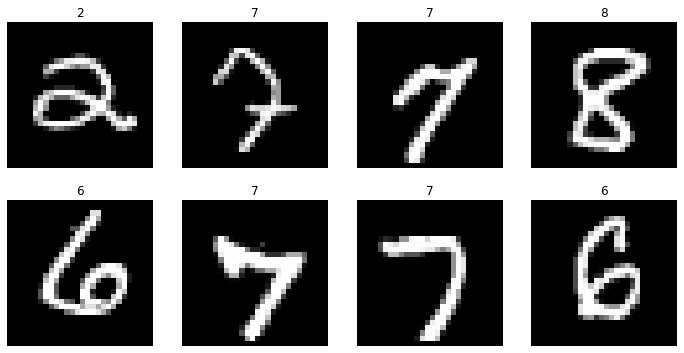

In [91]:
import matplotlib.pyplot as plt

fig, [[ax1,ax2,ax3,ax4],[ax5,ax6,ax7,ax8]]= plt.subplots(figsize=(12,6), ncols=4, nrows=2)

for i in range(1,9):
  index = torch.randint(len(trainset), size=(1,)).item()
  img, lb = trainset[index]
  globals()['ax{}'.format(i)].imshow(img.squeeze(), cmap='gray')
  globals()['ax{}'.format(i)].set_title(lb)
  globals()['ax{}'.format(i)].axis('off')
plt.show()